In [1]:
!pip install pandas textblob matplotlib

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
file_path = '../Resources/Datasets/folk_tales_deduplicated.csv'
folk_tales_df = pd.read_csv(file_path)

In [3]:
# Check unique values in the 'nation' column
unique_nations = folk_tales_df['nation'].unique()
unique_nations


array(['japanese', 'serbian', 'german', 'french', 'north_american_native',
       'brazilian', 'armenian', 'english', 'russian', 'greek', 'danish',
       'canadian_native', 'ukrainian', 'indian', 'norwegian', 'welsh',
       'scandinavian', 'polish', 'czechoslovak', 'scottish', 'celtic',
       'portuguese', 'arabic', 'croatian', 'estonian', 'dutch', 'italian',
       'nigerian', 'albanian', 'maori', 'nordic', 'irish', 'hungarian',
       'south_african', 'slavic', 'australian_ethnic', 'chinese',
       'tanzanian', 'swedish', 'icelandic', 'philippine', 'hawaiian',
       'jewish', 'romanian', 'korean', 'turkish', 'finnish', 'belgian',
       'spanish', 'cataloanian', 'bulgarian', 'bukovinian',
       'new_zealand_native', 'sami', 'pakistani', 'lithuanian', nan,
       'zimbabwe'], dtype=object)

In [4]:
# Remove rows where the 'nation' column has NaN values
folk_tales_df = folk_tales_df.dropna(subset=['nation'])

# Verify the removal by checking the first few rows
folk_tales_df.head()


,source,nation,title,text
0,https://fairytalez.com/momotaro/,japanese,Momotaro,If you’ll believe me there was a time when the...
1,https://fairytalez.com/the-birdcatcher/,serbian,The Birdcatcher,Near Constantinople there lived a man who knew...
2,https://fairytalez.com/sharing-joy-and-sorrow/,german,Sharing Joy and Sorrow,"There was once a tailor, who was a quarrelsome..."
3,https://fairytalez.com/the-punishment-of-gangana/,french,The Punishment of Gangana,Once upon a time there lived a king and queen ...
4,https://fairytalez.com/the-peace-with-the-snakes/,north_american_native,The Peace with the Snakes,In those days there was a Piegan chief named O...


In [5]:
# Check unique values in the 'nation' column
unique_nations = folk_tales_df['nation'].unique()
unique_nations

array(['japanese', 'serbian', 'german', 'french', 'north_american_native',
       'brazilian', 'armenian', 'english', 'russian', 'greek', 'danish',
       'canadian_native', 'ukrainian', 'indian', 'norwegian', 'welsh',
       'scandinavian', 'polish', 'czechoslovak', 'scottish', 'celtic',
       'portuguese', 'arabic', 'croatian', 'estonian', 'dutch', 'italian',
       'nigerian', 'albanian', 'maori', 'nordic', 'irish', 'hungarian',
       'south_african', 'slavic', 'australian_ethnic', 'chinese',
       'tanzanian', 'swedish', 'icelandic', 'philippine', 'hawaiian',
       'jewish', 'romanian', 'korean', 'turkish', 'finnish', 'belgian',
       'spanish', 'cataloanian', 'bulgarian', 'bukovinian',
       'new_zealand_native', 'sami', 'pakistani', 'lithuanian',
       'zimbabwe'], dtype=object)

In [6]:
# Capitalize the first letter of each word and remove underscores in the 'nation' column
folk_tales_df['nation'] = folk_tales_df['nation'].str.replace('_', ' ').str.title()

# Verify the changes by checking the first few rows
folk_tales_df.head()



,source,nation,title,text
0,https://fairytalez.com/momotaro/,Japanese,Momotaro,If you’ll believe me there was a time when the...
1,https://fairytalez.com/the-birdcatcher/,Serbian,The Birdcatcher,Near Constantinople there lived a man who knew...
2,https://fairytalez.com/sharing-joy-and-sorrow/,German,Sharing Joy and Sorrow,"There was once a tailor, who was a quarrelsome..."
3,https://fairytalez.com/the-punishment-of-gangana/,French,The Punishment of Gangana,Once upon a time there lived a king and queen ...
4,https://fairytalez.com/the-peace-with-the-snakes/,North American Native,The Peace with the Snakes,In those days there was a Piegan chief named O...


In [7]:
!pip install pycountry langdetect


In [8]:
import pycountry
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Create a set of country names using pycountry
countries = set([country.name for country in pycountry.countries])

# Function to detect if a string is a nation or a language
def classify_nation_or_language(name):
    if name in countries:
        return 'nation'
    else:
        try:
            # Attempt to detect the language
            lang = detect(name)
            return 'Language'
        except LangDetectException:
            return 'Unknown'

# Apply the function to classify each entry
folk_tales_df['Classification'] = folk_tales_df['nation'].apply(classify_nation_or_language)

# Separate the nations and languages
nations_df = folk_tales_df[folk_tales_df['Classification'] == 'nation']
languages_df = folk_tales_df[folk_tales_df['Classification'] == 'Language']

# Show the first few rows of each DataFrame
nations_df.head(), languages_df.head()

(                                                 source    nation  \
 2301         https://fairytalez.com/the-magic-mirror-2/  Zimbabwe   
 2544  https://fairytalez.com/the-story-of-the-hero-m...  Zimbabwe   
 
                              title  \
 2301              The Magic Mirror   
 2544  The Story of the Hero Makoma   
 
                                                    text Classification  
 2301  A long, long while ago, before ever the White ...         nation  
 2544  Once upon a time, at the town of Senna on the ...         nation  ,
                                               source                 nation  \
 0                   https://fairytalez.com/momotaro/               Japanese   
 1            https://fairytalez.com/the-birdcatcher/                Serbian   
 2     https://fairytalez.com/sharing-joy-and-sorrow/                 German   
 3  https://fairytalez.com/the-punishment-of-gangana/                 French   
 4  https://fairytalez.com/the-peace-with-the-

In [9]:
# Group by classification and nation, and count the number of folktales
classification_counts = folk_tales_df.groupby(['Classification', 'nation']).size().reset_index(name='count')

# Display the results sorted by classification and count
classification_counts.sort_values(by=['Classification', 'count'], ascending=[True, False], inplace=True)
classification_counts


,Classification,nation,count
36,Language,North American Native,370
21,Language,Greek,304
20,Language,German,277
19,Language,French,168
25,Language,Indian,130
16,Language,English,120
27,Language,Italian,105
11,Language,Chinese,101
28,Language,Japanese,88
35,Language,Nordic,85


In [10]:
# Filter the DataFrame to show only entries classified as 'Language'
language_counts = classification_counts[classification_counts['Classification'] == 'Language']

# Sort the results by count without modifying the original DataFrame in place
language_counts = language_counts.sort_values(by='count', ascending=False)

# Display the results
language_counts



,Classification,nation,count
36,Language,North American Native,370
21,Language,Greek,304
20,Language,German,277
19,Language,French,168
25,Language,Indian,130
16,Language,English,120
27,Language,Italian,105
11,Language,Chinese,101
28,Language,Japanese,88
35,Language,Nordic,85


In [11]:
# Filter the DataFrame to show only entries classified as 'Nation'
nation_counts = classification_counts[classification_counts['Classification'] == 'nation']

# Sort the results by count without modifying the original DataFrame in place
nation_counts = nation_counts.sort_values(by='count', ascending=False)

# Display the results
nation_counts




,Classification,nation,count
56,nation,Zimbabwe,2


In [12]:
# Count the total number of entries classified as 'Language'
total_languages = classification_counts[classification_counts['Classification'] == 'Language'].shape[0]

# Display the total count of languages
total_languages


56

In [13]:
# Count the total number of entries classified as 'Language'
total_nations = classification_counts[classification_counts['Classification'] == 'nation'].shape[0]

# Display the total count of languages
total_nations


1

In [14]:
# Define a function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to the text column
folk_tales_df['polarity'], folk_tales_df['subjectivity'] = zip(*folk_tales_df['text'].apply(get_sentiment))


In [15]:
# Group by nation and calculate mean sentiment
nation_sentiment = folk_tales_df.groupby('nation')[['polarity', 'subjectivity']].mean().reset_index()

# Display the results
nation_sentiment.sort_values(by='polarity', ascending=False, inplace=True)
nation_sentiment


,nation,polarity,subjectivity
22,Hawaiian,0.170377,0.444941
32,Maori,0.155774,0.514908
56,Zimbabwe,0.153134,0.521505
6,Bukovinian,0.148053,0.476076
30,Korean,0.147063,0.515514
38,Pakistani,0.145792,0.490497
45,Scandinavian,0.139588,0.518076
41,Portuguese,0.139100,0.521815
14,Danish,0.139072,0.509705
7,Bulgarian,0.135420,0.480178


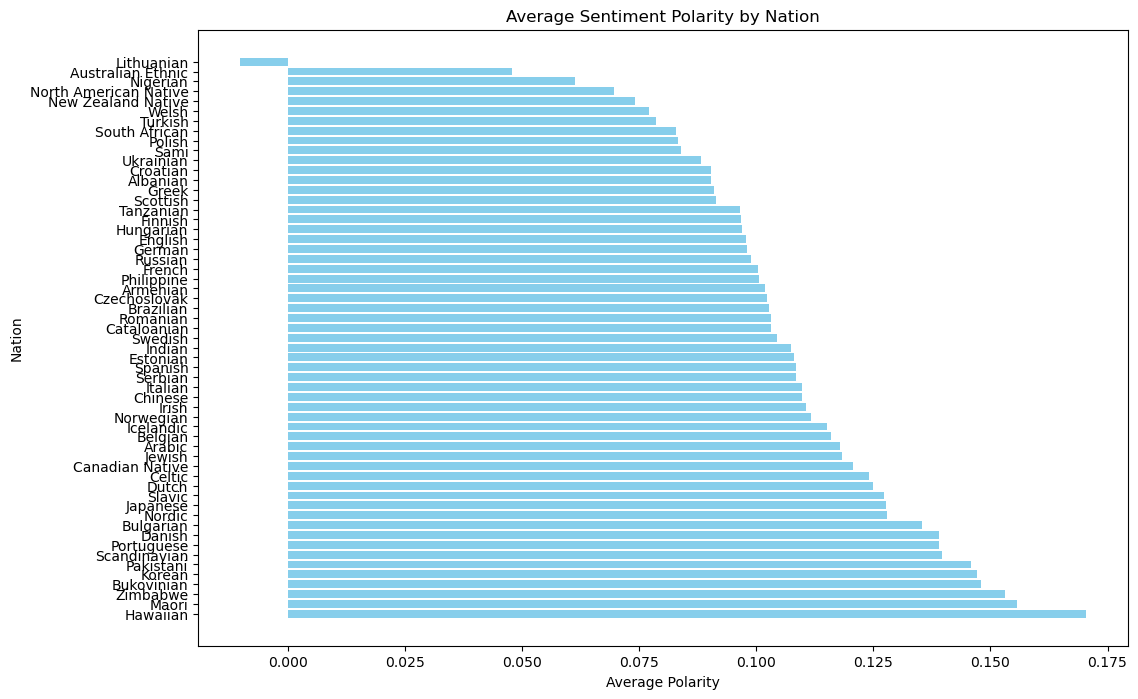

In [16]:
# Simple bar plot for polarity by nation
plt.figure(figsize=(12, 8))
plt.barh(nation_sentiment['nation'], nation_sentiment['polarity'], color='skyblue')
plt.xlabel('Average Polarity')
plt.ylabel('Nation')
plt.title('Average Sentiment Polarity by Nation')
plt.show()


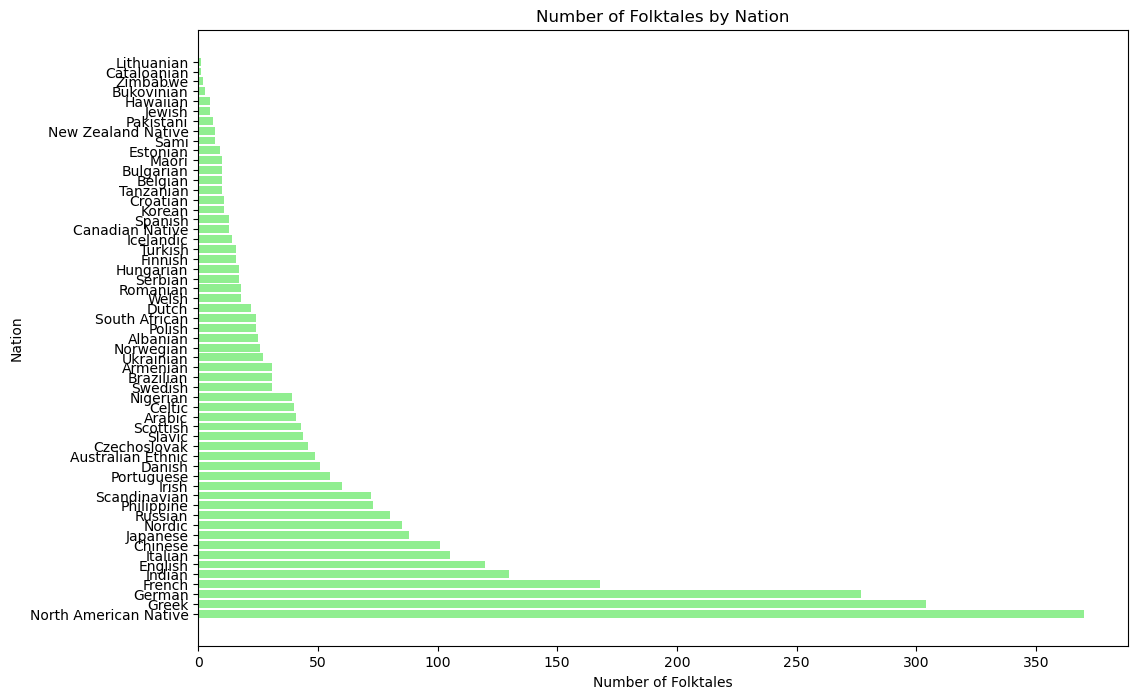

In [37]:
# Simple bar plot for number of folktales by nation
plt.figure(figsize=(12, 8))
plt.barh(folktales_count['nation'], folktales_count['count'], color='lightgreen')
plt.xlabel('Number of Folktales')
plt.ylabel('Nation')
plt.title('Number of Folktales by Nation')
plt.show()


In [20]:
# Check the column names in the DataFrame
folk_tales_df.columns

Index(['source', 'nation', 'title', 'text', 'Classification', 'polarity',
       'subjectivity'],
      dtype='object')

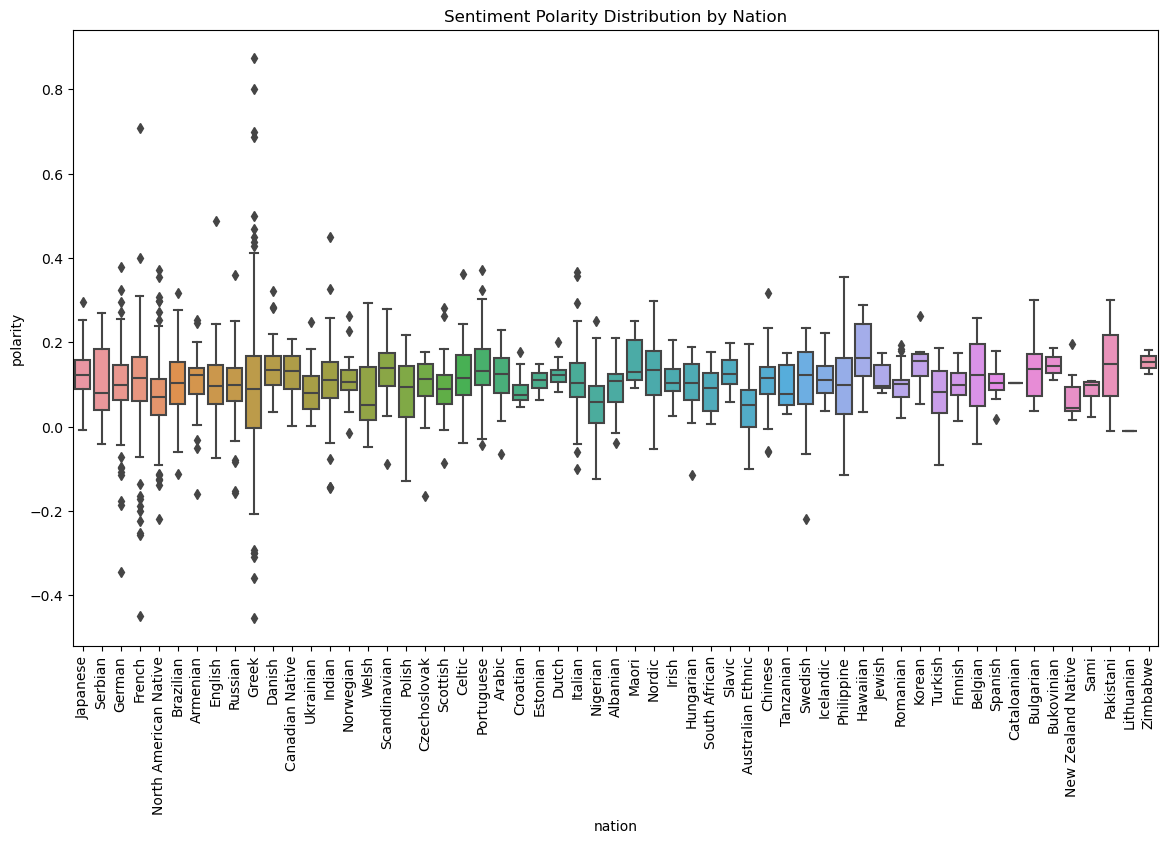

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='nation', y='polarity', data=folk_tales_df)
plt.xticks(rotation=90)
plt.title('Sentiment Polarity Distribution by Nation')
plt.show()


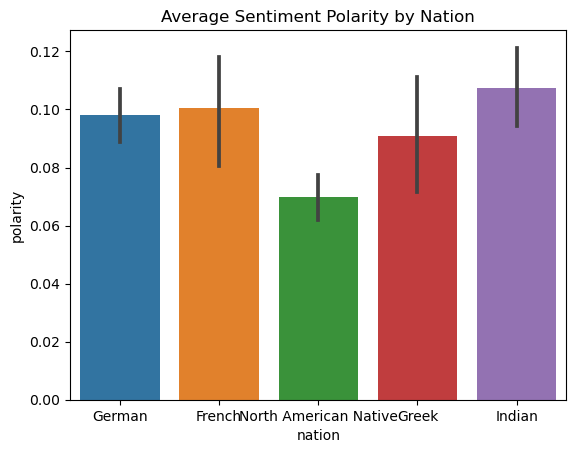

In [22]:
# Count the number of folktales per nation
folktales_count = folk_tales_df['nation'].value_counts().reset_index()
folktales_count.columns = ['nation', 'count']

# Select the top 5 nations with the most folktales
top_nations = folktales_count.head(5)['nation']  # Adjust the number as needed

# Filter the DataFrame to only include rows from the top nations
comparison_df = folk_tales_df[folk_tales_df['nation'].isin(top_nations)]

# Plot the average sentiment polarity by nation for the top nations
sns.barplot(x='nation', y='polarity', data=comparison_df)
plt.title('Average Sentiment Polarity by Nation')
plt.show()



In [23]:
!pip install wordcloud

In [24]:
# Check the distribution of polarity values
folk_tales_df['polarity'].describe()


count    2932.000000
mean        0.100356
std         0.093719
min        -0.453409
25%         0.053094
50%         0.102779
75%         0.150002
max         0.875000
Name: polarity, dtype: float64

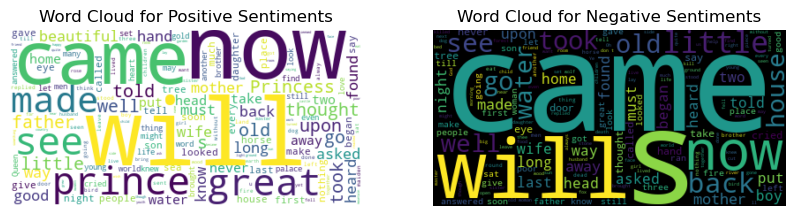

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define additional stop words to exclude common storytelling words
additional_stopwords = set(['said', 'one', 'went', 'king', 'come', 'time', 'saw', 'like', 'man', 'day'])

# Combine the default STOPWORDS with the additional ones
stopwords = STOPWORDS.union(additional_stopwords)

# Set new thresholds based on the distribution
positive_text = " ".join(text for text in folk_tales_df[folk_tales_df['polarity'] > 0.15]['text'])
negative_text = " ".join(text for text in folk_tales_df[folk_tales_df['polarity'] < 0.05]['text'])

# Generate word clouds with the adjusted thresholds and stopwords excluded
if positive_text:
    wordcloud_positive = WordCloud(background_color="white", stopwords=stopwords).generate(positive_text)
    
if negative_text:
    wordcloud_negative = WordCloud(background_color="black", stopwords=stopwords).generate(negative_text)

# Plot the word clouds only if there is data for both
if positive_text and negative_text:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Word Cloud for Positive Sentiments')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Word Cloud for Negative Sentiments')
    plt.axis('off')

    plt.show()
else:
    print("Not enough data to generate one or both word clouds.")






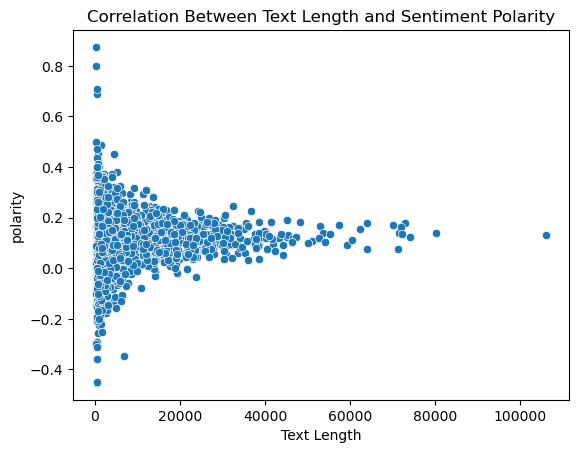

In [27]:
folk_tales_df['Text Length'] = folk_tales_df['text'].apply(len)

sns.scatterplot(x='Text Length', y='polarity', data=folk_tales_df)
plt.title('Correlation Between Text Length and Sentiment Polarity')
plt.show()


In [28]:
!pip install geopandas


In [29]:
# Group by nation and count the number of folktales
folktales_count = folk_tales_df.groupby('nation').size().reset_index(name='count')

# Display the results
folktales_count.sort_values(by='count', ascending=False, inplace=True)
folktales_count


,nation,count
36,North American Native,370
21,Greek,304
20,German,277
19,French,168
25,Indian,130
16,English,120
27,Italian,105
11,Chinese,101
28,Japanese,88
35,Nordic,85


In [68]:
# Export the sentiment analysis results to a CSV file
nation_sentiment.to_csv('./nation_sentiment.csv', index=False)


In [30]:
# Ensure that the 'title' column is included in the DataFrame
sentiment_analysis_df = folk_tales_df[['title', 'nation', 'polarity', 'subjectivity']]

# Export the results to a CSV file
output_file_path = '../Resources/Datasets/folk_tales_sentiment_analysis.csv'
sentiment_analysis_df.to_csv(output_file_path, index=False)

